# Unsupervised ML: Clustering

## Contents:
1. Imports
2. Data Cleaning
3. Elbow Technique
4. Mapping Clusters
5. Exports

### 1. Imports

In [8]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import stats
import sklearn
from sklearn.cluster import KMeans # k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [3]:
# Define path and import df

path = r'C:\Users\walls\Documents\Coding\Data Analysis\CareerFoundry\Data Immersion A6\CA SAT Analysis'

df_sr_mapped = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'School Rates Mapped.csv'), index_col = False)

In [4]:
df_sr_mapped.shape

(1217, 7)

In [5]:
df_sr_mapped.head()

,index,school,enroll12,test_takers,Test Rates,Enroll Category,County Name
0,5,Alameda Science and Technology Institute,37,35,0.945946,High enrollment,Alameda County
1,7,Alameda High,381,255,0.669291,High enrollment,Alameda County
2,8,Alameda Community Learning Center,52,46,0.884615,High enrollment,Alameda County
3,9,Alternatives in Action,31,17,0.548387,Average enrollment,Alameda County
4,12,Albany High,285,179,0.628070,High enrollment,Alameda County


### 2. Data Cleaning

In [6]:
# Remove categorical columns and irrelevant numerical columns

df_sr_mapped2 = df_sr_mapped.select_dtypes(include=[np.number])
df_sr_mapped2.drop('index', axis=1, inplace=True)

In [9]:
# Standardize the data

df_standardized = df_sr_mapped2.apply(stats.zscore)

In [10]:
df_standardized.head()

,enroll12,test_takers,Test Rates
0,-1.381295,-1.069452,2.176380
1,0.219674,0.647308,0.711910
2,-1.311486,-0.983614,1.851727
3,-1.409219,-1.209914,0.071904
4,-0.227108,0.054246,0.493706


### 3. Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [12]:
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))] # create a score for cluster rate variation

score

[-3650.9999999999995,
 -2082.9505283666176,
 -1356.0872010984617,
 -977.1500166819906,
 -835.1515590842037,
 -709.4092147023747,
 -614.732444419019,
 -556.8433722502369,
 -481.88826459374104]

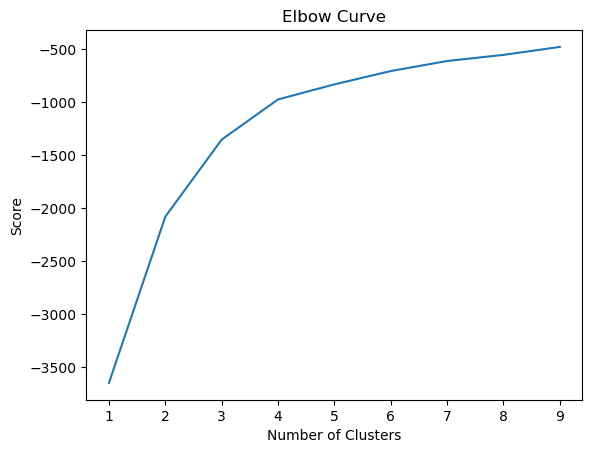

In [13]:
# Plot elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Best number for clustering is 4 as indicated by the line moving up on slightly higher afterwards

In [14]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_standardized)

KMeans(n_clusters=4)

In [16]:
# Add clusters column to df 

df_standardized['clusters'] = kmeans.fit_predict(df_sr_mapped2)

In [17]:
df_standardized.head()

,enroll12,test_takers,Test Rates,clusters
0,-1.381295,-1.069452,2.176380,3
1,0.219674,0.647308,0.711910,1
2,-1.311486,-0.983614,1.851727,3
3,-1.409219,-1.209914,0.071904,3
4,-0.227108,0.054246,0.493706,1


In [18]:
df_standardized['clusters'].value_counts()

clusters
3    450
0    339
1    334
2     94
Name: count, dtype: int64

### 4. Mapping clusters

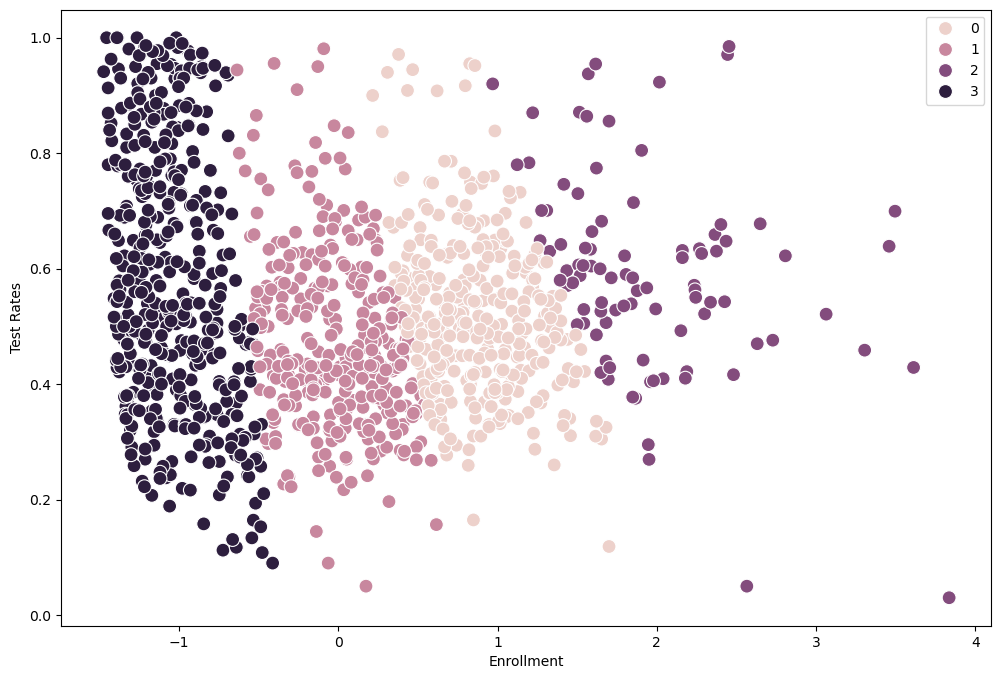

In [26]:
# Plot the clusters for the "Enrollment" and "Test Rates" 

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df_standardized['enroll12'], y=df_sr_mapped2['Test Rates'], hue=kmeans.labels_, s=100) 
# Subset `X` for the x and y arguments to avoid using their labels
# `hue` is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot

ax.grid(False) # Remove the grid from the background.
plt.xlabel('Enrollment') # Label x-axis
plt.ylabel('Test Rates') # Label y-axis
plt.show()

##### Observations
1. Very little overlap between the clusters
2. Possible outliers: 2 purple plot points with high enrollment and low test rate
3. Dark purple plot points mostly cluster around low enrollment and high test rates
4. Dark purple plots points are the most consistently dense -- dark pink, light pink, and purple after about .7
5. Purple has spaced out plot points and fewer plot points in general
6. All have a trend of low to high amount of test rates

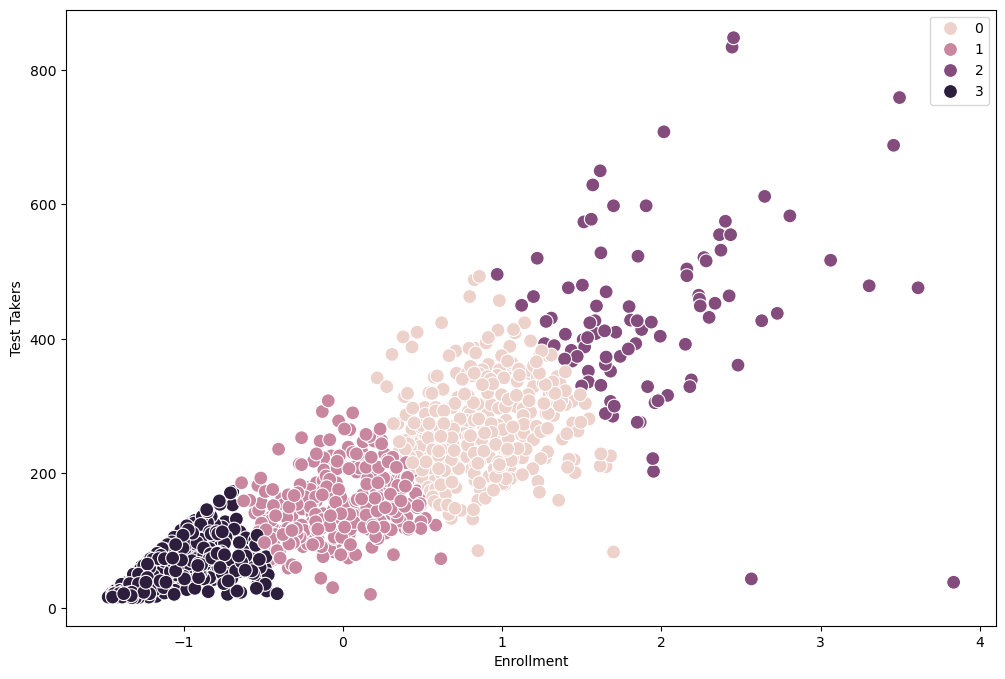

In [27]:
# Plot the clusters for the "Enrollment" and "Test Takers" 

plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=df_standardized['enroll12'], y=df_sr_mapped2['test_takers'], hue=kmeans.labels_, s=100) 
# Subset `X` for the x and y arguments to avoid using their labels
# `hue` is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot

ax.grid(False) # Remove the grid from the background.
plt.xlabel('Enrollment') # Label x-axis
plt.ylabel('Test Takers') # Label y-axis
plt.show()

##### Observations
1. As the previous scatterplot, very little overlap in clusters
2. Dark purple and light pink appear the mostly densely populated
3. Purple is still pretty scattered out and fewer plot points
4. As enrollment rises, test taker totals also rise
5. The scattering of purple could show that having a higher number of students makes it more difficult to promote SAT test taking wheras dark purple being densely populated could show it's easier to make sure students know about the SAT test dates, etc.

In [21]:
# Create groupings for clusters
df_standardized.loc[df_standardized['clusters'] == 3, 'cluster'] = 'dark purple'
df_standardized.loc[df_standardized['clusters'] == 2, 'cluster'] = 'purple'
df_standardized.loc[df_standardized['clusters'] == 1, 'cluster'] = 'dark pink'
df_standardized.loc[df_standardized['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
# Grab stats on clusters

df_standardized.groupby('cluster').agg({'enroll12':['mean', 'median'], 
                         'test_takers':['mean', 'median'], 'Test Rates':['mean', 'median'] 
                        })

enroll12           test_takers           Test Rates          
                 mean    median        mean    median       mean    median
cluster                                                                   
dark pink   -0.016495 -0.013025   -0.146167 -0.179858  -0.330626 -0.504156
dark purple -1.044399 -1.071806   -0.878232 -0.921186   0.250152  0.039480
light pink   0.862912  0.843307    0.737152  0.678522  -0.086683 -0.154494
purple       1.946400  1.822970    2.065213  1.985601   0.289854  0.260889

##### Observations:
1. Purple has the best stats overall - With the highest mean and median, purple has the highest enrollment and test takers. Purple's mean is not the highest, but the median is, which does indicate a strong test rate
2. Dark purple has the highest mean for test rates that could support low enrollment has better test rates
3. Dark pink has the lowest stats, indicating lowest enrollment and lowest test participation
4. Pink seems to be an average for enrollment and test takers, however pink has relatively low test rates in comparison, aside from with dark pink

##### Usefulness: 
This data could be used in determining which schools need support in promoting SAT testing. Based on these results, further analysis could be conducted to determine why test rates are low such as underperformance of students, curriculum not meeting student needs, or schools not being active enough in test programs (dark pink/light pink). 
Conversely, the data could also be used to determine what works well for students to be more motivated to take the SATs (purple/dark purple).

### 5. Exports

In [25]:
# Export df

df_standardized.to_csv(os.path.join(path, 'Data','Prepared Data', 'Standardized School Rates.csv'))

In [28]:
# Export scatterplots 

ax1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'enrollvrates.png'))
ax2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'enrollvtakers.png'))